In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle

In [2]:
features = pd.read_excel('数据融合--高温合金数据库.xlsx')
label1 = np.array(features['UTS'])
label2 = np.array(features['TYS'])
label3 = np.array(features['EL'])
label4 = np.array(features['RA'])
features= features.drop('UTS', axis = 1)
features= features.drop('TYS', axis = 1)
features= features.drop('EL', axis = 1)
features= features.drop('RA', axis = 1)
features= features.drop('合金牌号', axis = 1)
features= features.drop('材料', axis = 1)
features= features.drop('熔炼工艺', axis = 1)
features= features.drop('C', axis = 1)
features= features.drop('B', axis = 1)
features= features.drop('Zr', axis = 1)
features

,Ni,Cr,Co,Fe,Al,Ti,Nb,Mo,W,拉伸温度,固溶处理温度,固溶处理时间,稳定时效温度,稳定时效时间,时效温度,时效时间
0,67.643,16.451,7.518,0.104,2.064,2.756,2.236,3.852,1.074,20,1080,8.0,0,0.0,700,16.0
1,73.820,16.840,7.651,0.118,1.918,3.070,1.962,3.358,1.077,500,1080,8.0,0,0.0,700,16.0
2,73.593,17.040,8.222,0.109,1.466,3.095,1.835,2.383,1.096,600,1080,8.0,0,0.0,700,16.0
3,73.880,14.767,9.211,0.032,1.660,3.427,1.798,2.965,1.216,650,1080,8.0,0,0.0,700,16.0
4,73.690,14.580,9.296,0.638,1.588,3.554,1.796,2.957,1.329,700,1080,8.0,0,0.0,700,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,73.260,15.300,0.006,7.180,0.640,2.530,0.950,0.000,0.000,20,1155,2.0,845,24.0,705,20.0
1016,73.550,15.480,0.040,6.990,0.790,2.490,1.000,0.000,0.000,20,1025,2.0,843,24.0,704,24.0
1017,72.510,15.380,0.030,8.320,0.860,2.140,0.950,0.000,0.000,20,1025,2.0,843,24.0,704,24.0
1018,72.360,16.220,0.020,6.900,0.680,2.410,0.000,0.000,0.000,20,0,0.0,0,0.0,0,0.0


In [3]:
n_samples, n_features = features.shape
features = pd.get_dummies(features)
feature_list = list(features.columns)#获取列名
features = np.array(features)#获取影响因子
from sklearn.preprocessing import MinMaxScaler, StandardScaler
features = MinMaxScaler().fit_transform(features)#将进行归一化处理
from sklearn.model_selection import train_test_split
test_ratio = 0.25#按照四比一划分数据集合；3/4的数据用于训练集合，1/4的数据用于验证集合。
SEED = 26 ### the test/train data is checked on this seed, it has similiar distribution to the whole dataset
train_features1, test_features1, train_labels1, test_labels1 = train_test_split(features, label1,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)
train_features2, test_features2, train_labels2, test_labels2 = train_test_split(features, label2,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)
train_features3, test_features3, train_labels3, test_labels3 = train_test_split(features, label3,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)
train_features4, test_features4, train_labels4, test_labels4 = train_test_split(features, label4,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


# 抗拉强度

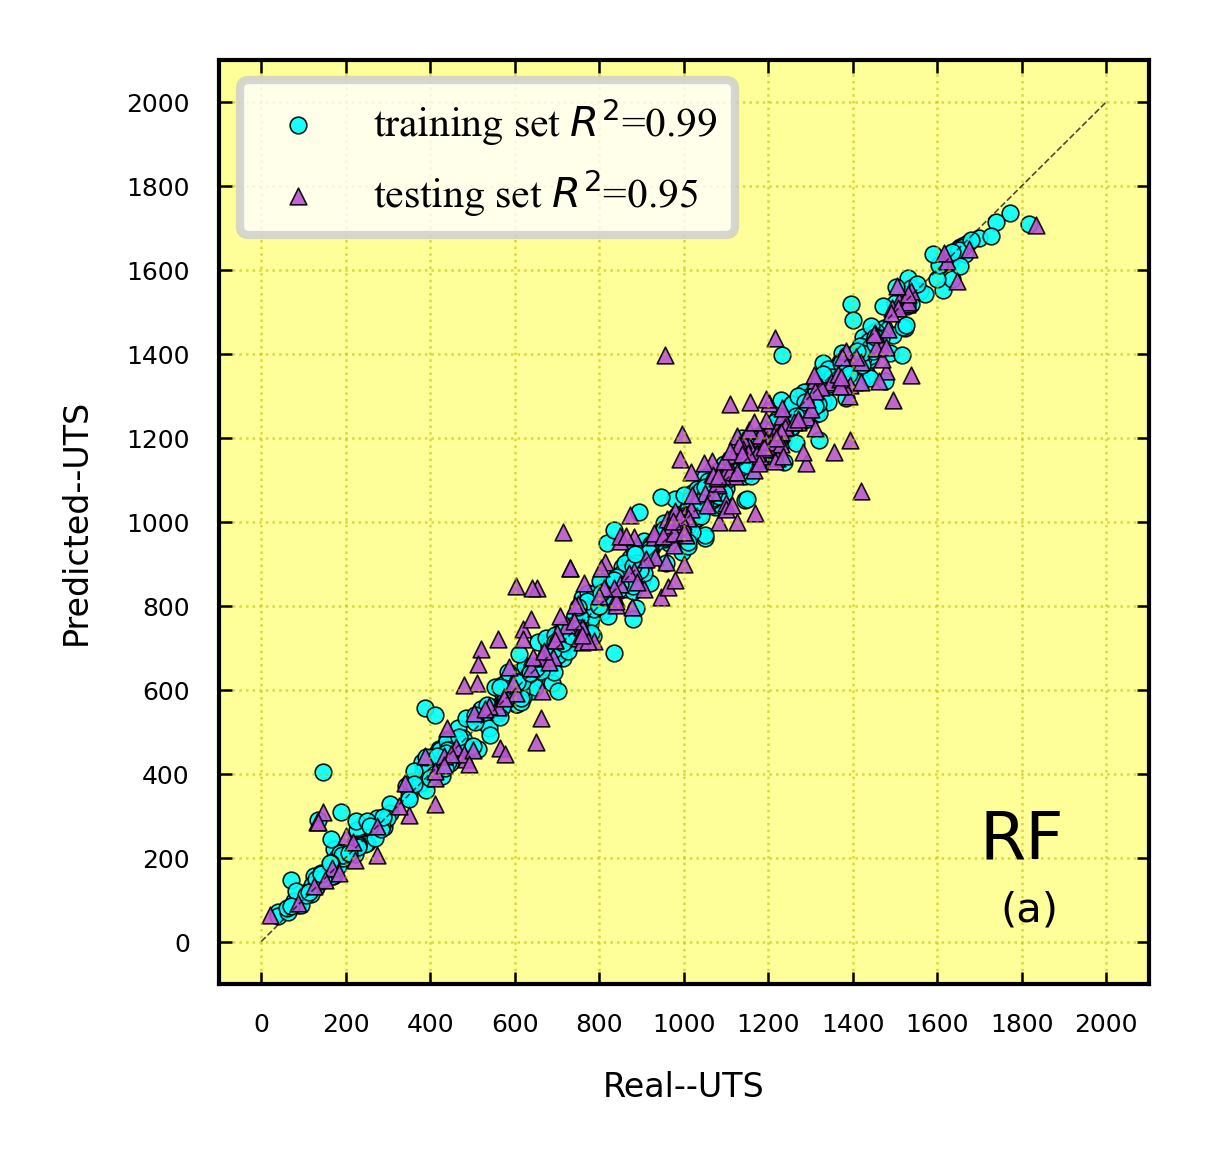

RMSE (Train): 34.63
RMSE (Test): 83.25
R^2 (Train): 0.99
R^2 (Test): 0.95


In [4]:
# from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Create and fit the RF model
model_seed = 100 
from sklearn.ensemble import RandomForestRegressor
model_rf_uts = RandomForestRegressor(random_state=model_seed)
model_rf_uts.fit(train_features1, train_labels1)
# Make predictions
train_predicted_UTS = model_rf_uts.predict(train_features1)
test_predicted_UTS = model_rf_uts.predict(test_features1)

# Calculate performance metrics
rmse_tr_rf = mean_squared_error(train_labels1, train_predicted_UTS, squared=False)
rmse_te_rf = mean_squared_error(test_labels1, test_predicted_UTS, squared=False)
r2_tr_rf = r2_score(train_labels1, train_predicted_UTS)
r2_te_rf = r2_score(test_labels1, test_predicted_UTS)

# Define a function for MAPE (assuming you have this function defined)
def mape_function(predicted, actual):
    # Your MAPE calculation logic here
    pass

mape_tr_rf = mape_function(train_predicted_UTS, train_labels1)
mape_te_rf = mape_function(test_predicted_UTS, test_labels1)

# Set up the plot with a light blue background
plt.rcParams['figure.figsize'] = (2.0, 2.0)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

ax = plt.axes()
ax.set_facecolor("#FFFF99")  # Light blue color
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')

new_ticks = list(np.arange(0, 2001, 200))
plt.xticks(new_ticks, fontsize=3)
plt.yticks(new_ticks, fontsize=3)
plt.plot([0, 2001], [0, 2001], 'k--', linewidth='0.2', alpha=0.7)

# Plot the training set with circles and testing set with triangles
plt.scatter(train_labels1, train_predicted_UTS, alpha=0.9, s=4, linewidths=0.2, c='#00FFFF',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.2f' % r2_tr_rf, marker='o')
plt.scatter(test_labels1, test_predicted_UTS, alpha=0.9, s=4, linewidths=0.2, c='#BA55D3',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.2f' % r2_te_rf, marker='^')

plt.legend(prop={'family': 'Times New Roman', 'size': 5.0}, ncol=1)
plt.tick_params(which='major', direction='in', length=1.5, width=0.3, color='red', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Real--UTS', size=4)
plt.ylabel('Predicted--UTS', size=4)
plt.text(1700, 200,'RF',fontsize=8)# 在图中添加文字
plt.text(1750, 50,'(a)',fontsize=5)# 在图中添加文字
plt.show()
print("RMSE (Train): {:.2f}".format(rmse_tr_rf))
print("RMSE (Test): {:.2f}".format(rmse_te_rf))
print("R^2 (Train): {:.2f}".format(r2_tr_rf))
print("R^2 (Test): {:.2f}".format(r2_te_rf))

# 屈服强度

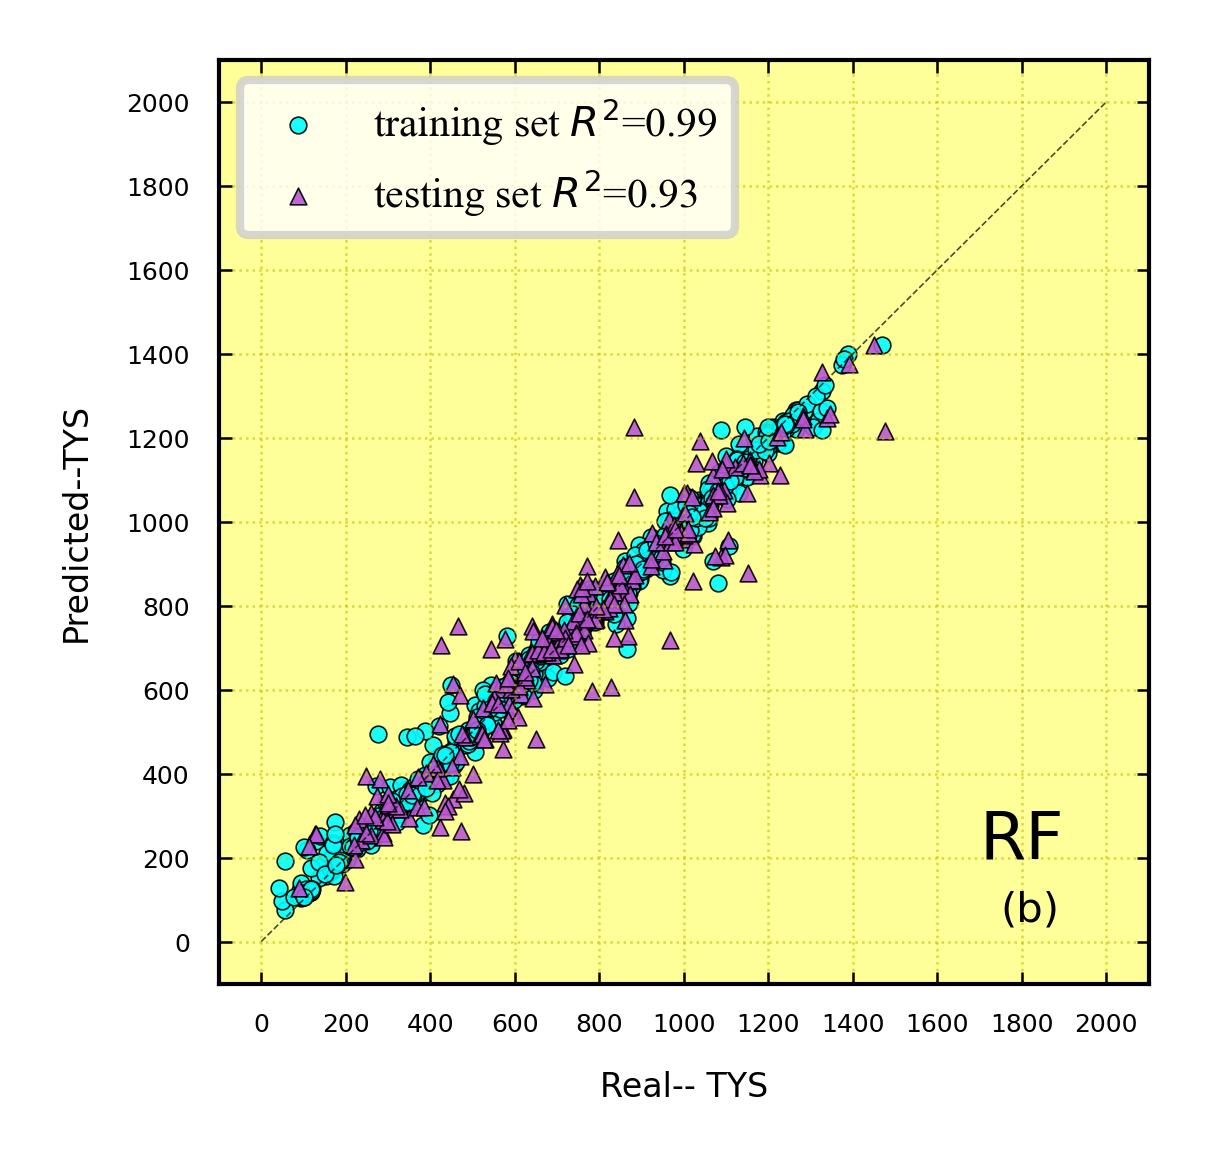

RMSE (Train): 34.44
RMSE (Test): 78.61
R^2 (Train): 0.99
R^2 (Test): 0.93


In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

model_seed = 100
from sklearn.ensemble import RandomForestRegressor
model_rf_tys = RandomForestRegressor(random_state=model_seed)
model_rf_tys.fit(train_features2, train_labels2)
# Make predictions
train_predicted_TYS = model_rf_tys.predict(train_features2)
test_predicted_TYS = model_rf_tys.predict(test_features2)

# Calculate performance metrics
rmse_tr_rf = mean_squared_error(train_labels2, train_predicted_TYS, squared=False)
rmse_te_rf = mean_squared_error(test_labels2, test_predicted_TYS, squared=False)
r2_tr_rf = r2_score(train_labels2, train_predicted_TYS)
r2_te_rf = r2_score(test_labels2, test_predicted_TYS)

# Define a function for MAPE (assuming you have this function defined)
# Set up the plot with a light blue background
plt.rcParams['figure.figsize'] = (2.0, 2.0)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

ax = plt.axes()
ax.set_facecolor("#FFFF99")  # Light blue color
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')

new_ticks = list(np.arange(0, 2001, 200))
plt.xticks(new_ticks, fontsize=3)
plt.yticks(new_ticks, fontsize=3)
plt.plot([0, 2001], [0, 2001], 'k--', linewidth='0.2', alpha=0.7)

# Plot the training set with circles and testing set with triangles
plt.scatter(train_labels2, train_predicted_TYS, alpha=0.9, s=4, linewidths=0.2, c='#00FFFF',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.2f' % r2_tr_rf, marker='o')
plt.scatter(test_labels2, test_predicted_TYS, alpha=0.9, s=4, linewidths=0.2, c='#BA55D3',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.2f' % r2_te_rf, marker='^')

plt.legend(prop={'family': 'Times New Roman', 'size': 5.0}, ncol=1)
plt.tick_params(which='major', direction='in', length=1.5, width=0.3, color='red', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Real-- TYS', size=4)
plt.ylabel('Predicted--TYS', size=4)
plt.text(1700, 200,'RF',fontsize=8)# 在图中添加文字
plt.text(1750, 50,'(b)',fontsize=5)# 在图中添加文字
plt.show()
print("RMSE (Train): {:.2f}".format(rmse_tr_rf))
print("RMSE (Test): {:.2f}".format(rmse_te_rf))
print("R^2 (Train): {:.2f}".format(r2_tr_rf))
print("R^2 (Test): {:.2f}".format(r2_te_rf))

# 断后延伸率

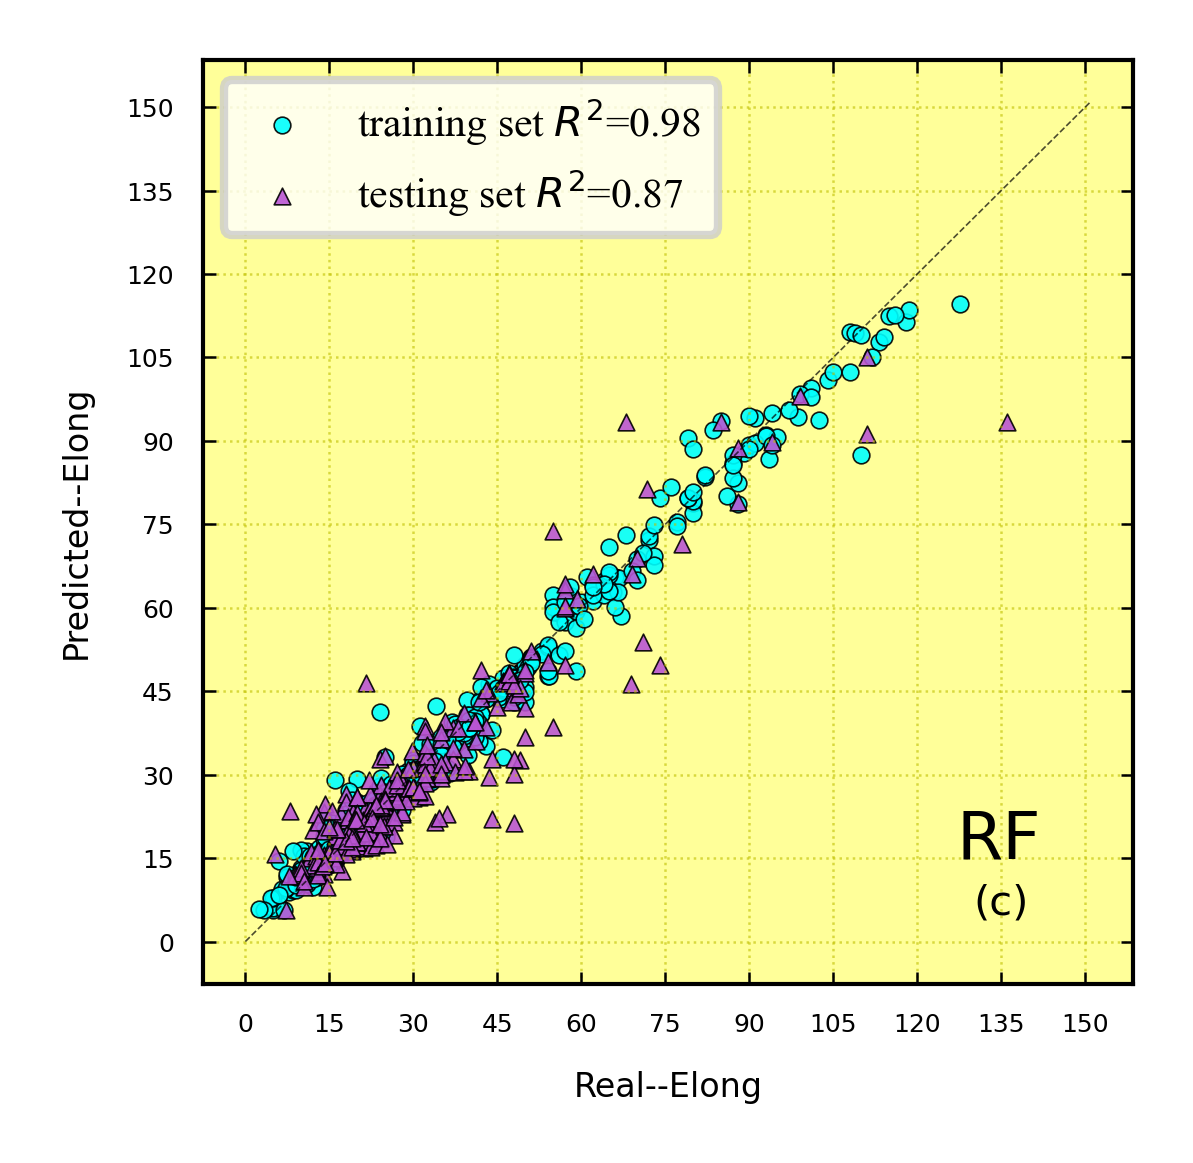

RMSE (Train): 2.78
RMSE (Test): 6.95
R^2 (Train): 0.98
R^2 (Test): 0.87


In [6]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Create and fit the RF model
model_seed = 100 
from sklearn.ensemble import RandomForestRegressor
model_rf_el = RandomForestRegressor(random_state=model_seed)
model_rf_el.fit(train_features3, train_labels3)

# Make predictions
train_predicted_el = model_rf_el.predict(train_features3)
test_predicted_el = model_rf_el.predict(test_features3)

# Calculate performance metrics
rmse_tr_rf = mean_squared_error(train_labels3, train_predicted_el, squared=False)
rmse_te_rf = mean_squared_error(test_labels3, test_predicted_el, squared=False)
r2_tr_rf = r2_score(train_labels3, train_predicted_el)
r2_te_rf = r2_score(test_labels3, test_predicted_el)

# Define a function for MAPE (assuming you have this function defined)
def mape_function(predicted, actual):
    # Your MAPE calculation logic here
    pass

mape_tr_rf = mape_function(train_predicted_el, train_labels3)
mape_te_rf = mape_function(test_predicted_el, test_labels3)

# Set up the plot with a light blue background
plt.rcParams['figure.figsize'] = (2.0, 2.0)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

ax = plt.axes()
ax.set_facecolor("#FFFF99")  # Light blue color
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')
new_ticks = list(np.arange(0, 151, 15))
plt.xticks(new_ticks, fontsize=3)
plt.yticks(new_ticks, fontsize=3)
plt.plot([0, 151], [0, 151], 'k--', linewidth='0.2', alpha=0.7)
# Plot the training set with circles and testing set with triangles
plt.scatter(train_labels3, train_predicted_el, alpha=0.9, s=4, linewidths=0.2, c='#00FFFF',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.2f' % r2_tr_rf, marker='o')
plt.scatter(test_labels3, test_predicted_el, alpha=0.9, s=4, linewidths=0.2, c='#BA55D3',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.2f' % r2_te_rf, marker='^')
plt.legend(prop={'family': 'Times New Roman', 'size': 5.0}, ncol=1)
plt.tick_params(which='major', direction='in', length=1.5, width=0.3, color='red', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Real--Elong', size=4)
plt.ylabel('Predicted--Elong', size=4)
plt.text(127, 15,'RF',fontsize=8)# 在图中添加文字
plt.text(130, 5,'(c)',fontsize=5)# 在图中添加文字
plt.show()
print("RMSE (Train): {:.2f}".format(rmse_tr_rf))
print("RMSE (Test): {:.2f}".format(rmse_te_rf))
print("R^2 (Train): {:.2f}".format(r2_tr_rf))
print("R^2 (Test): {:.2f}".format(r2_te_rf))

# 断后收缩率

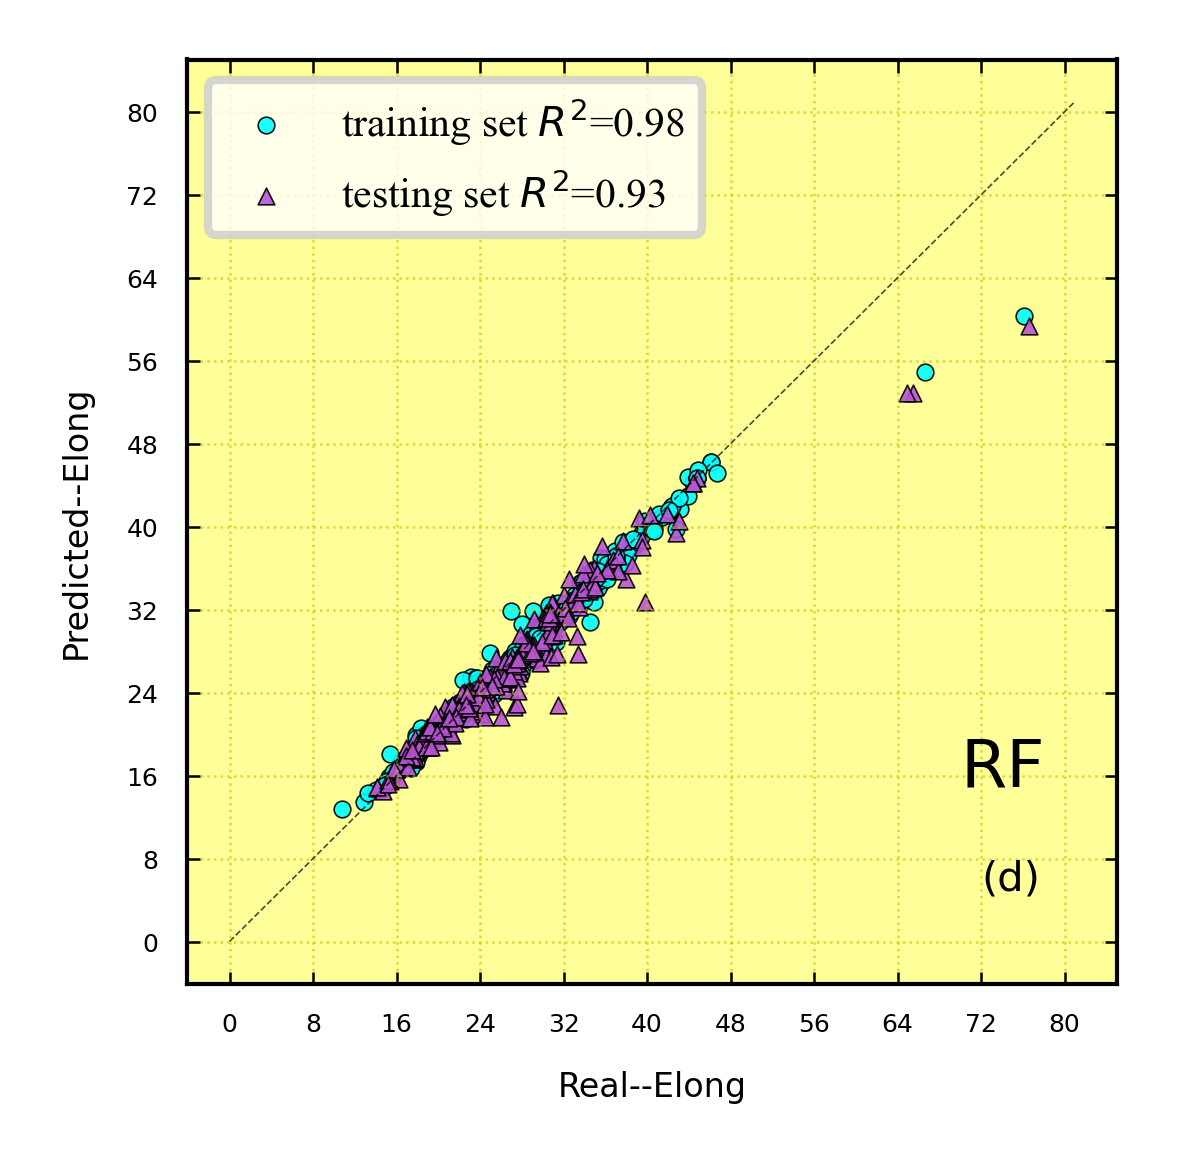

RMSE (Train): 0.95
RMSE (Test): 2.12
R^2 (Train): 0.98
R^2 (Test): 0.93


In [7]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Create and fit the RF model
model_seed = 100 
from sklearn.ensemble import RandomForestRegressor
model_rf_ra = RandomForestRegressor(random_state=model_seed)
model_rf_ra.fit(train_features4, train_labels4)

# Make predictions
train_predicted_ra = model_rf_ra.predict(train_features4)
test_predicted_ra = model_rf_ra.predict(test_features4)

# Calculate performance metrics
rmse_tr_rf = mean_squared_error(train_labels4, train_predicted_ra, squared=False)
rmse_te_rf = mean_squared_error(test_labels4, test_predicted_ra, squared=False)
r2_tr_rf = r2_score(train_labels4, train_predicted_ra)
r2_te_rf = r2_score(test_labels4, test_predicted_ra)

# Define a function for MAPE (assuming you have this function defined)
def mape_function(predicted, actual):
    # Your MAPE calculation logic here
    pass

mape_tr_rf = mape_function(train_predicted_ra, train_labels4)
mape_te_rf = mape_function(test_predicted_ra, test_labels4)

# Set up the plot with a light blue background
plt.rcParams['figure.figsize'] = (2.0, 2.0)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

ax = plt.axes()
ax.set_facecolor("#FFFF99")  # Light blue color
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')
new_ticks = list(np.arange(0, 81, 8))
plt.xticks(new_ticks, fontsize=3)
plt.yticks(new_ticks, fontsize=3)
plt.plot([0, 81], [0, 81], 'k--', linewidth='0.2', alpha=0.7)
# Plot the training set with circles and testing set with triangles
plt.scatter(train_labels4, train_predicted_ra, alpha=0.9, s=4, linewidths=0.2, c='#00FFFF',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.2f' % r2_tr_rf, marker='o')
plt.scatter(test_labels4, test_predicted_ra, alpha=0.9, s=4, linewidths=0.2, c='#BA55D3',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.2f' % r2_te_rf, marker='^')
plt.legend(prop={'family': 'Times New Roman', 'size': 5.0}, ncol=1)
plt.tick_params(which='major', direction='in', length=1.5, width=0.3, color='red', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Real--Elong', size=4)
plt.ylabel('Predicted--Elong', size=4)
plt.text(70, 15,'RF',fontsize=8)# 在图中添加文字
plt.text(72, 5,'(d)',fontsize=5)# 在图中添加文字
plt.show()
print("RMSE (Train): {:.2f}".format(rmse_tr_rf))
print("RMSE (Test): {:.2f}".format(rmse_te_rf))
print("R^2 (Train): {:.2f}".format(r2_tr_rf))
print("R^2 (Test): {:.2f}".format(r2_te_rf))

In [8]:
data=pd.read_excel('4169拉伸.xlsx')
data

,Ni,Cr,Co,Fe,Al,Ti,Nb,Mo,W,温度,固溶处理温度,固溶处理时间,稳定时效温度,稳定时效时间,时效温度,时效时间,抗拉强度,屈服强度,断后伸长率,断后收缩率
0,51.82,18.94,0.03,19.35,0.59,1,5.23,3.01,0,20,960,1,720,8,620,8,1345,1086,22.5,42.2


In [9]:
data= data.drop('抗拉强度', axis = 1)
data= data.drop('屈服强度', axis = 1)
data= data.drop('断后伸长率', axis = 1)
data= data.drop('断后收缩率', axis = 1)

In [13]:
new_data_x_scaled=np.array(data)#获取影响因子
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#new_data_x_scaled = MinMaxScaler().fit_transform(new_data_x_scaled)#将进行归一化处理

In [14]:
predicted_y1 = model_rf_uts.predict(new_data_x_scaled)
predicted_y2 = model_rf_tys.predict(new_data_x_scaled)
predicted_y3 = model_rf_el.predict(new_data_x_scaled)
predicted_y4 = model_rf_ra.predict(new_data_x_scaled)